In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [31]:
class Perceptron:
  def __init__(self, eta, epochs, activationFunction):
    self.weights = np.random.randn(3) * 1e-4
    print(f"self.weights: {self.weights}")
    self.eta = eta
    self.epochs = epochs
    self.activationFunction = activationFunction

  def fit(self, X, y):
    self.X = X
    self.y = y

    X_with_bias = np.c_[self.X, -np.ones((len(self.X), 1))] # concactination
    print(f"X_with_bias: \n{X_with_bias}")

    for epoch in range(1,self.epochs):
      print(f"for epoch: {epoch}")
      y_hat = self.activationFunction(X_with_bias, self.weights)
      print(f"predicted value: \n{y_hat}")
      error = self.y - y_hat
      print(f"error: \n{error}")
      self.weights = self.weights + self.eta * np.dot(X_with_bias.T, error)
      print(f"updated weights: \n{self.weights}")
      print("~~~~~~~~~~~~~~~~~~~~~\n")

  def predict(self, X):
    X_with_bias = np.c_[X, -np.ones((len(self.X), 1))]
    return self.activationFunction(X_with_bias, self.weights)


In [32]:
activationFunction = lambda inputs, weights: np.where(np.dot(inputs, weights) > 0 , 1, 0)

In [33]:
data={"x1": [1,1,0,-1,-1,-1], "x2": [1,0,1,-1,0,1],"y": [1,1,0,0,0,0]}
inp = pd.DataFrame(data)
inp

,x1,x2,y
0,1,1,1
1,1,0,1
2,0,1,0
3,-1,-1,0
4,-1,0,0
5,-1,1,0


In [34]:
X = inp.drop("y", axis=1) # axis = 1 >>> dropping accross column
X

,x1,x2
0,1,1
1,1,0
2,0,1
3,-1,-1
4,-1,0
5,-1,1


In [35]:
y = inp['y']
y.to_frame()

,y
0,1
1,1
2,0
3,0
4,0
5,0


In [36]:
model = Perceptron(eta = 1, epochs=10, activationFunction=activationFunction)

self.weights: [-2.42165037e-05 -2.15825272e-04  1.14973426e-04]


In [37]:
model.fit(X,y)

X_with_bias: 
[[ 1.  1. -1.]
 [ 1.  0. -1.]
 [ 0.  1. -1.]
 [-1. -1. -1.]
 [-1.  0. -1.]
 [-1.  1. -1.]]
for epoch: 1
predicted value: 
[0 0 0 1 0 0]
error: 
0    1
1    1
2    0
3   -1
4    0
5    0
Name: y, dtype: int64
updated weights: 
[ 2.99997578  1.99978417 -0.99988503]
~~~~~~~~~~~~~~~~~~~~~

for epoch: 2
predicted value: 
[1 1 1 0 0 0]
error: 
0    0
1    0
2   -1
3    0
4    0
5    0
Name: y, dtype: int64
updated weights: 
[2.99997578e+00 9.99784175e-01 1.14973426e-04]
~~~~~~~~~~~~~~~~~~~~~

for epoch: 3
predicted value: 
[1 1 1 0 0 0]
error: 
0    0
1    0
2   -1
3    0
4    0
5    0
Name: y, dtype: int64
updated weights: 
[ 2.99997578e+00 -2.15825272e-04  1.00011497e+00]
~~~~~~~~~~~~~~~~~~~~~

for epoch: 4
predicted value: 
[1 1 0 0 0 0]
error: 
0    0
1    0
2    0
3    0
4    0
5    0
Name: y, dtype: int64
updated weights: 
[ 2.99997578e+00 -2.15825272e-04  1.00011497e+00]
~~~~~~~~~~~~~~~~~~~~~

for epoch: 5
predicted value: 
[1 1 0 0 0 0]
error: 
0    0
1    0
2    0
3   

In [38]:
model.predict(X)

array([1, 1, 0, 0, 0, 0])

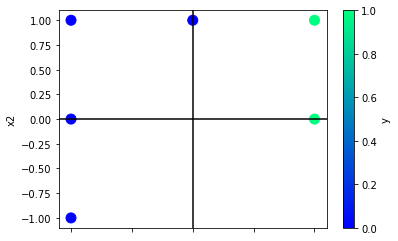

In [40]:
inp.plot(kind="scatter", x="x1", y="x2", c="y", s=100, cmap="winter")
plt.axhline(y=0, color="black")
plt.axvline(x=0, color="black")